# <center> ANALYSING CUISINE RATING DATASET

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./Cuisine_rating.csv')
data.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [4]:
data.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


#### Checking the Null percentage

In [5]:
data.isnull().mean()*100

User ID           0.0
Area code         0.0
Location          0.0
Gender            0.0
YOB               0.0
Marital Status    0.0
Activity          0.0
Budget            0.0
Cuisines          0.0
Alcohol           0.0
Smoker            0.0
Food Rating       0.0
Service Rating    0.0
Overall Rating    0.0
Often A S         0.0
dtype: float64

In [6]:
data.duplicated().sum()

0

In [7]:
data.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

### Renaming the columns

In [8]:
data.rename(columns={'Marital Status':'Marital_Status','Alcohol ':'Alcohol','Food Rating':'Food_Rating','Service Rating':'Service_Rating','Overall Rating':'Overall_Rating','Often A S':'Often_A_S'},inplace=True)
data.head()

,User ID,Area code,Location,Gender,YOB,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


### creating age column

In [9]:
data['Age']=[(2022-YOB) for YOB in data['YOB']]
data.head()

,User ID,Area code,Location,Gender,YOB,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25


### Dropping the unwanted columns

In [10]:
data.drop(columns=['YOB','User ID','Area code'],inplace=True)
data.head()

,Location,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45
3,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
4,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25


### CUSTOM FUNCTION TO CREATE LOCATION

In [11]:
def sort_location (Location):
    data_location=data[data.Location==Location]
    data_location.drop(columns='Location',inplace=True)
    return data_location

In [12]:
Upper_East_Side_NY=sort_location('Upper East Side,NY')
Upper_East_Side_NY

,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age
0,Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16
3,Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66
7,Female,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes,19
15,Female,Married,Student,3,French,Often,Never,4,1,2.5,No,66
17,Male,Single,Student,3,Japanese,Often,Often,1,5,3.0,Yes,18
21,Female,Married,Professional,5,Italian,Socially,Never,1,4,2.5,No,39
38,Male,Married,Student,4,French,Never,Never,2,3,2.5,No,35
51,Female,Single,Student,3,Chinese,Often,Socially,3,2,2.5,No,17
52,Female,Single,Professional,4,Chinese,Never,Often,3,5,4.0,No,48
63,Female,Married,Student,5,Italian,Never,Socially,1,1,1.0,No,33


### Sorting a particular location

In [13]:
St_George_NY=sort_location('St. George,NY')
St_George_NY

,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age
1,Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31
10,Female,Married,Professional,4,French,Never,Often,3,2,2.5,No,47
11,Male,Married,Student,4,Chinese,Never,Socially,3,1,2.0,No,59
12,Female,Single,Professional,5,Chinese,Socially,Never,5,5,5.0,No,16
20,Female,Single,Student,3,Indian,Socially,Often,5,3,4.0,No,13
25,Male,Single,Professional,3,Japanese,Never,Socially,4,3,3.5,No,53
37,Female,Single,Student,5,French,Never,Never,3,2,2.5,No,32
39,Male,Single,Student,4,Filipino,Never,Never,3,1,2.0,No,36
42,Male,Married,Student,5,Japanese,Never,Never,3,1,2.0,No,37
44,Female,Married,Professional,3,Italian,Often,Never,4,1,2.5,No,53


## DESCRIPTIVE EDA

#### How many single female rates 5 for food in St_George_NY

In [14]:
Gender_Food_Rating_Marital_Status=St_George_NY.query("Gender == 'Female' & Food_Rating == 5 & Marital_Status == 'Single'")
Gender_Food_Rating_Marital_Status

,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age
12,Female,Single,Professional,5,Chinese,Socially,Never,5,5,5.0,No,16
20,Female,Single,Student,3,Indian,Socially,Often,5,3,4.0,No,13
97,Female,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,16
112,Female,Single,Professional,5,Chinese,Socially,Never,5,4,4.5,No,16
120,Female,Single,Student,3,Indian,Socially,Often,5,3,4.0,No,13
197,Female,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,16


#### <center> only 6 single females rated 5 for food at St_George_NY

### categorising people in the data on the basic of age 

In [15]:
cutoff=[0,18,50,80]
labels=['Child','Adult','Old']
data['Age_type']=pd.cut(data.Age,bins=cutoff,labels=labels)
data.head(10)

,Location,Gender,Marital_Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food_Rating,Service_Rating,Overall_Rating,Often_A_S,Age,Age_type
0,"Upper East Side,NY",Female,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,16,Child
1,"St. George,NY",Female,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,31,Adult
2,"Upper West Side,NY",Male,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,45,Adult
3,"Upper East Side,NY",Female,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,66,Old
4,"Central Park,NY",Male,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,25,Adult
5,"China Town, NY",Male,Single,Student,5,Seafood,Never,Never,5,1,3.0,No,27,Adult
6,"China Town, NY",Female,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No,45,Adult
7,"Upper East Side,NY",Female,Single,Professional,3,Filipino,Often,Often,5,2,3.5,Yes,19,Adult
8,"Riverdale,NY",Male,Single,Student,5,Italian,Socially,Socially,3,3,3.0,No,57,Old
9,"Central Park,NY",Male,Single,Student,4,Chinese,Often,Often,5,2,3.5,Yes,27,Adult


### Cross tabulation

In [16]:
pd.crosstab(St_George_NY.Food_Rating ,St_George_NY.Service_Rating )

Service_Rating,1,2,3,4,5
Food_Rating,,,,,
1,3,4,0,0,2
3,6,5,1,2,0
4,2,2,3,2,0
5,0,2,2,1,9


In [17]:
pd.crosstab(St_George_NY.Food_Rating ,St_George_NY.Gender)

Gender,Female,Male
Food_Rating,,
1,3,6
3,4,10
4,3,6
5,8,6


In [18]:
pd.crosstab(St_George_NY.Gender , St_George_NY.Marital_Status)

Marital_Status,Divorced,Married,Single
Gender,,,
Female,2,6,10
Male,2,10,16


# GRAPHICAL EDA

## Histogram of Overall_Rating

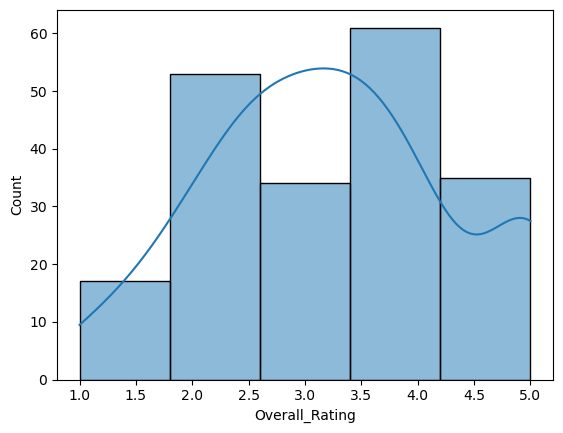

In [19]:
sns.histplot(data=data,x='Overall_Rating' , bins=5 , kde=True)
plt.show()

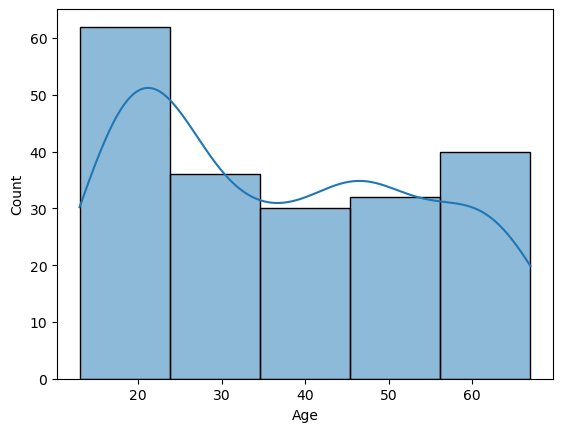

In [61]:
sns.histplot(data=data,x='Age' , bins=5 , kde=True)
plt.show()

# Subplots

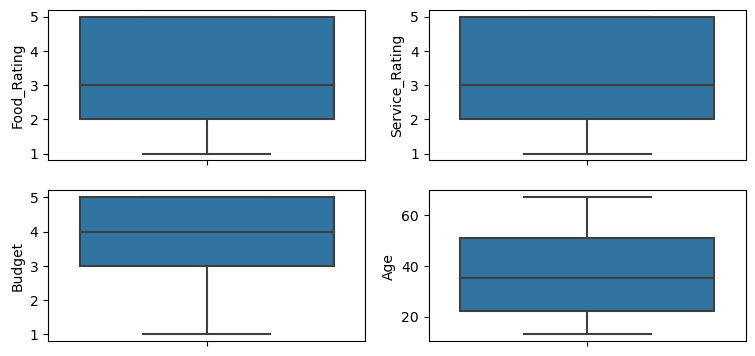

In [21]:
plt.figure(figsize=(9,9))
plt.subplot(4,2,1)
sns.boxplot(data=data,y='Food_Rating')

plt.subplot(4,2,2)
sns.boxplot(data=data,y='Service_Rating')

plt.subplot(4,2,3)
sns.boxplot(data=data,y='Budget')

plt.subplot(4,2,4)
sns.boxplot(data=data,y='Age')

plt.show()

# Boxplot

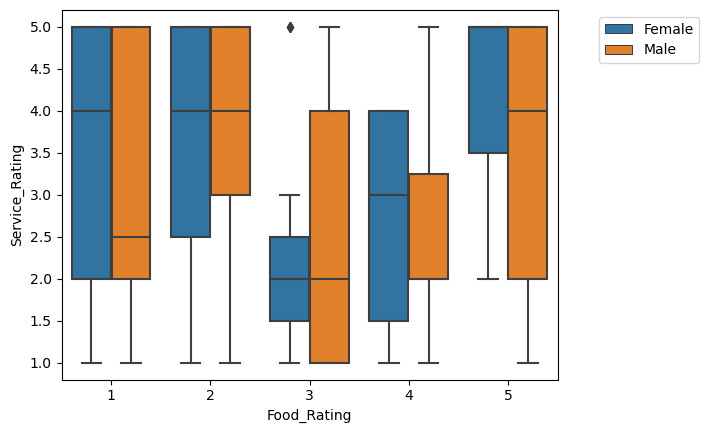

In [22]:
sns.boxplot(data=data,x='Food_Rating' ,y='Service_Rating',hue='Gender')
plt.legend(bbox_to_anchor = (1.3,1))
plt.show()

### Boxplot of St_George_NY

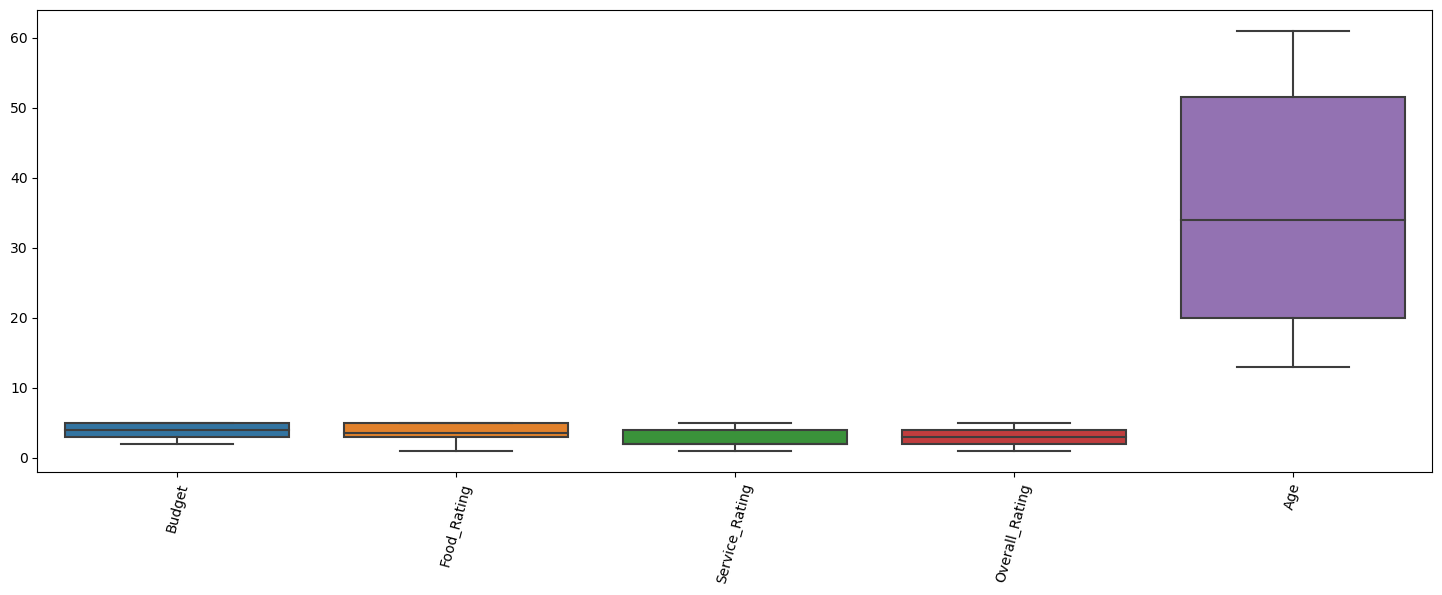

In [23]:
plt.figure(figsize=(18,6))
plt.xticks(rotation = 75)
sns.boxplot(data=St_George_NY)
plt.show()

## Subplots of locations in the data

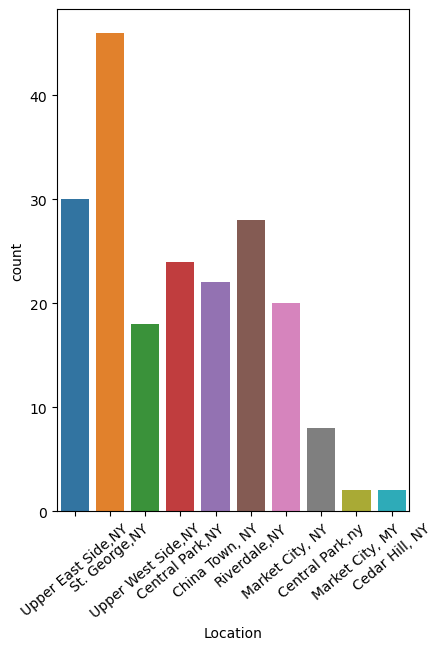

In [24]:
plt.figure(figsize=(10,30))
plt.subplot(4,2,1)
plt.xticks(rotation=40)
sns.countplot(data=data,x='Location')
plt.show()

# KDE plot

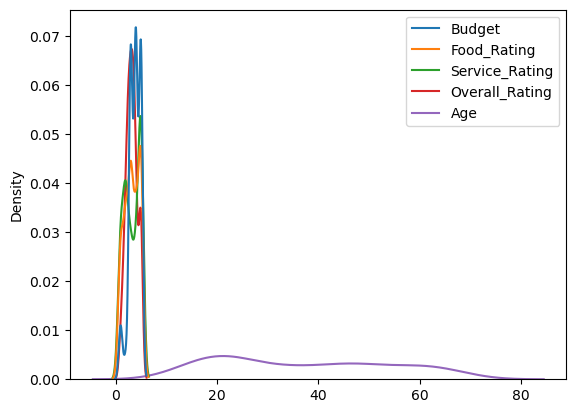

In [25]:
sns.kdeplot(data=data)
plt.show()

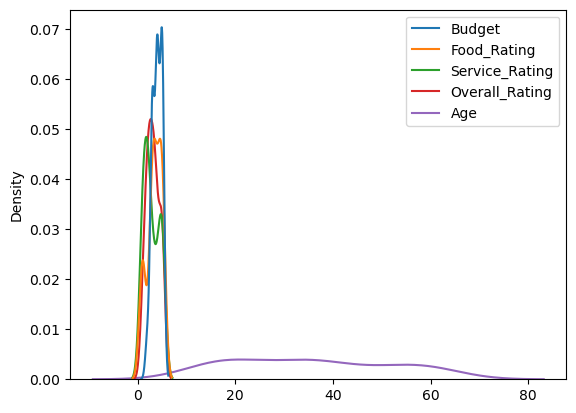

In [26]:
sns.kdeplot(data=St_George_NY)
plt.show()

# count plot

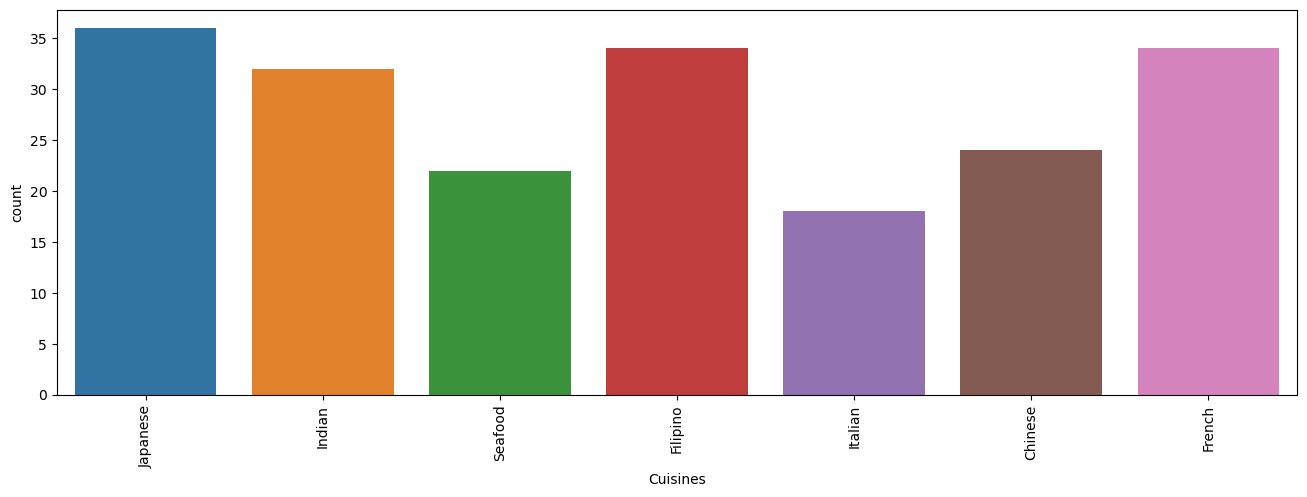

In [27]:
plt.figure(figsize=(16,5))
plt.xticks(rotation = 90)
sns.countplot(data=data,x='Cuisines')
plt.show()

#### <center> people eat more Japanese food 

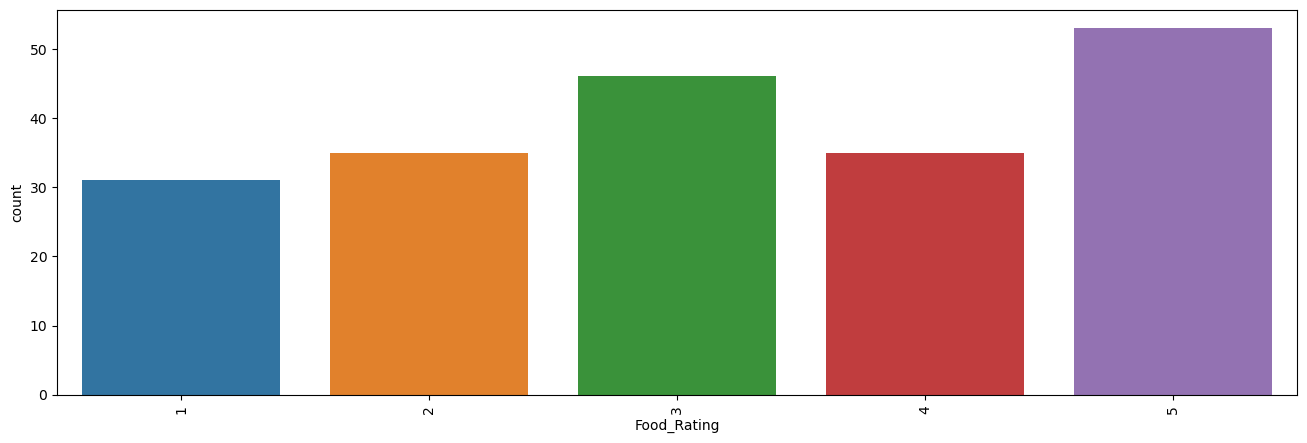

In [28]:
plt.figure(figsize=(16,5))
plt.xticks(rotation = 90)
sns.countplot(data=data,x='Food_Rating')
plt.show()

#### <center> people eat 5star rating foods more

# line chart

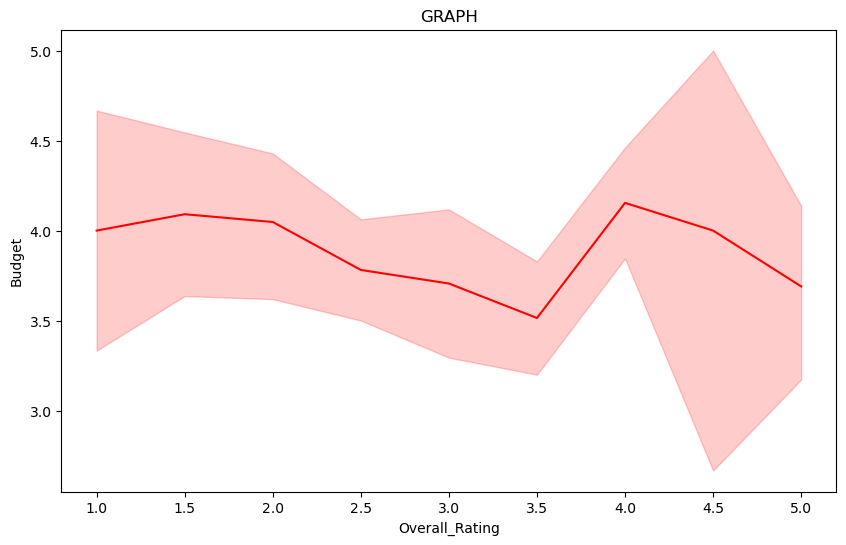

In [29]:
plt.figure(figsize=(10,6))
plt.xlabel('Overall_Rating')
plt.ylabel('Budget')
plt.title('GRAPH')
sns.lineplot(data=data,x='Overall_Rating', y='Budget', color='red')
plt.show()

# scatter plot

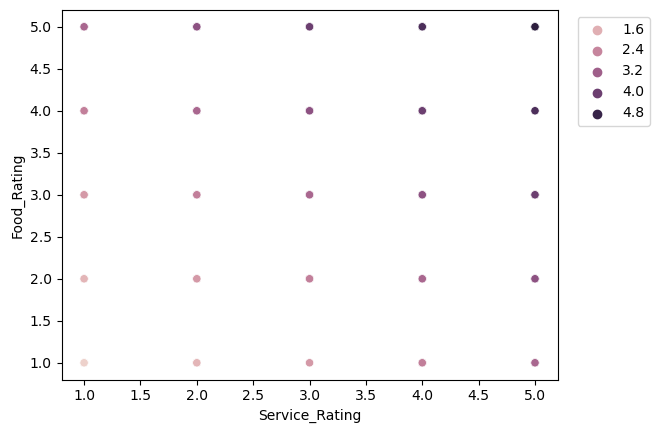

In [30]:
sns.scatterplot(data=data, x='Service_Rating', y='Food_Rating', hue='Overall_Rating')
plt.legend(bbox_to_anchor = (1.2, 1))
plt.show()

### <center> There is no correlation btw them

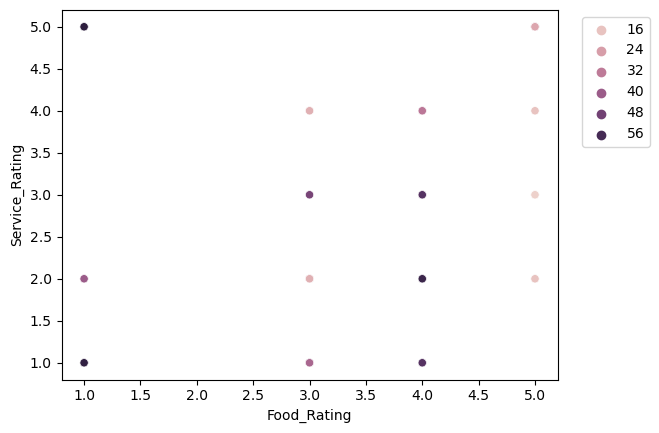

In [62]:
sns.scatterplot(data=St_George_NY, x='Food_Rating' , y='Service_Rating' , hue='Age')
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()

### <center> There is no correlation

In [32]:
data.Activity.value_counts().index

Index(['Student', 'Professional'], dtype='object')

In [33]:
palette_color = sns.color_palette('dark')

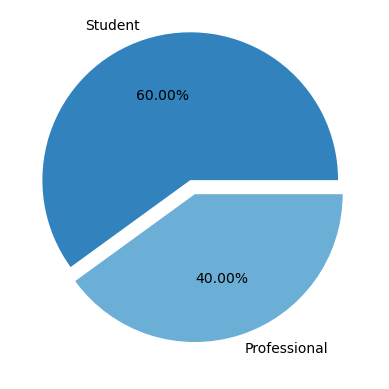

In [67]:
plt.pie(data=data, x=data.Activity.value_counts(),explode = [0.1, 0], colors=sns.color_palette('tab20c') , autopct="%1.2f%%",labels=['Student','Professional']);

### <center> Students are more than the Professionals 

In [35]:
data.Cuisines.value_counts().index

Index(['Japanese', 'Filipino', 'French', 'Indian', 'Chinese', 'Seafood',
       'Italian'],
      dtype='object')

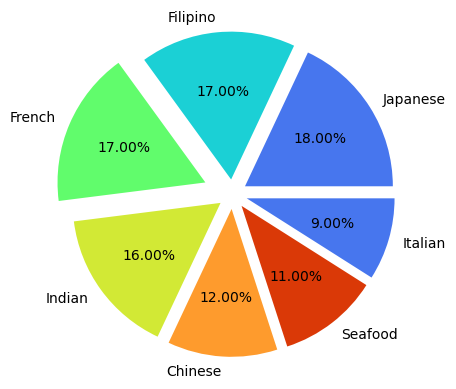

In [36]:
plt.pie(data=data,\
       x=data.Cuisines.value_counts(),\
       explode =[0.1,0.1,0.2,0.1,0.1,0.1,0.1],\
       colors=sns.color_palette('turbo'),\
       labels=['Japanese','Filipino','French','Indian','Chinese','Seafood','Italian'],\
       autopct='%1.2f%%')
plt.show();

### <center> percentage of cuisines : Japanese food is eaten more

# Heatmap

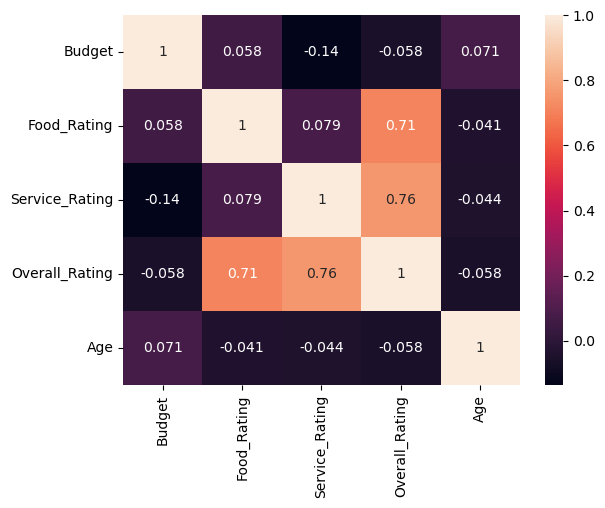

In [37]:
sns.heatmap(data.corr(), annot=True)
plt.show()

### <center> correlation btw each items in the data

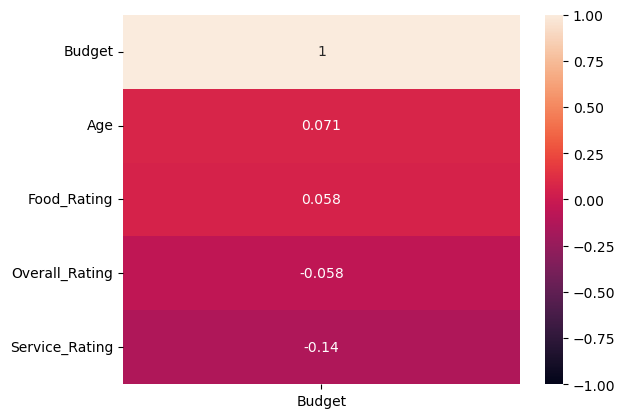

In [63]:
sns.heatmap(data.corr()[['Budget']].sort_values(by='Budget',ascending=False), vmax=1, vmin=-1, annot=True)
plt.show();

### <center> There is nothing in particular about the correlation in terms of Budget

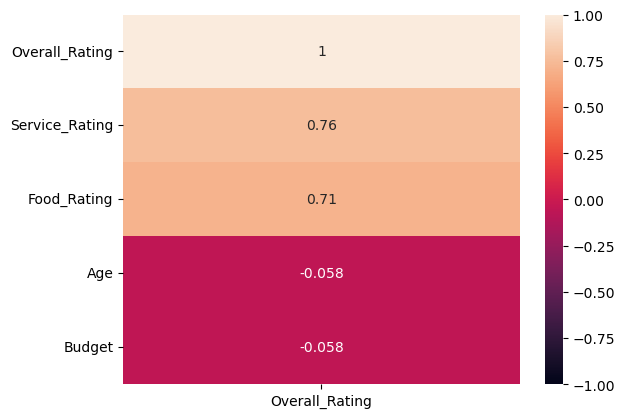

In [64]:
sns.heatmap(data.corr()[['Overall_Rating']].sort_values(by='Overall_Rating',ascending=False), vmax=1, vmin=-1, annot=True)
plt.show();

# Barplot

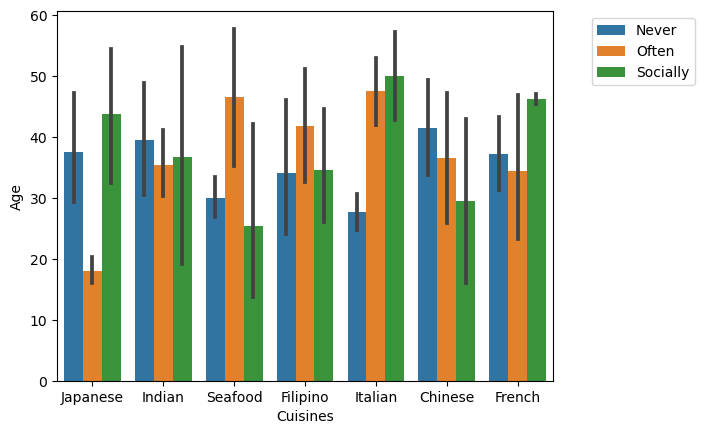

In [38]:
sns.barplot(x='Cuisines',y='Age',hue='Alcohol', data=data)
plt.legend(bbox_to_anchor = (1.3, 1))
plt.show()

### <center> people who eat italian food drink alcohol more oftenly and socially

### Regplot

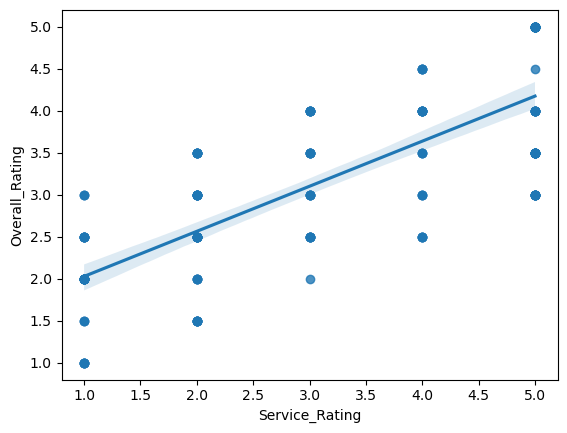

In [52]:
sns.regplot(data=data, x='Service_Rating' , y='Overall_Rating')
plt.show()

### <center> There is a linear regression btw Service_Rating and Overall_Rating

### catplot

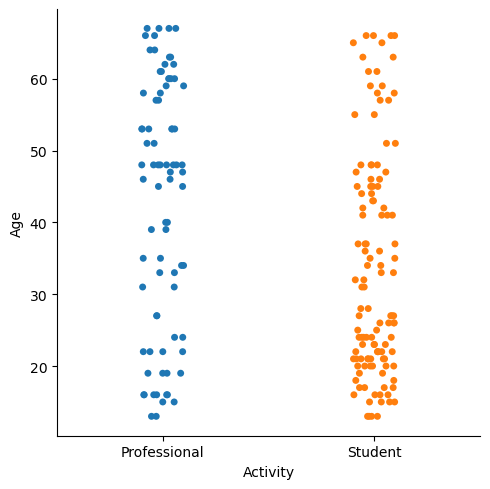

In [60]:
sns.catplot(data=data, x='Activity' , y='Age')
plt.show()

### Boxenplot

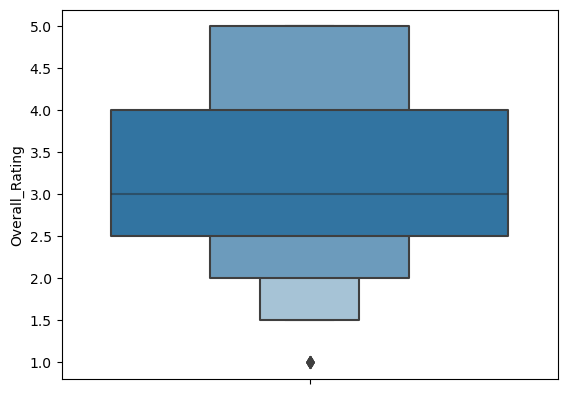

In [42]:
sns.boxenplot(data=data , y='Overall_Rating')
plt.show()

### violin plot

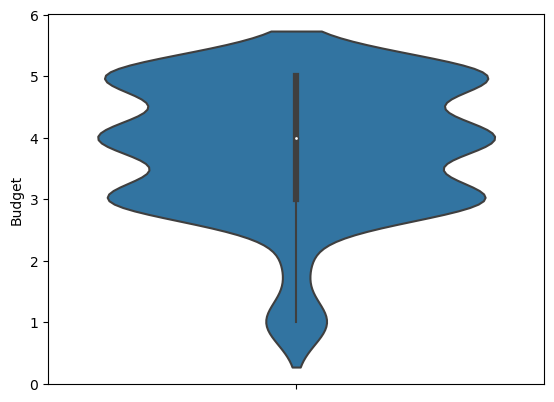

In [43]:
sns.violinplot(data=data , y='Budget')
plt.show()

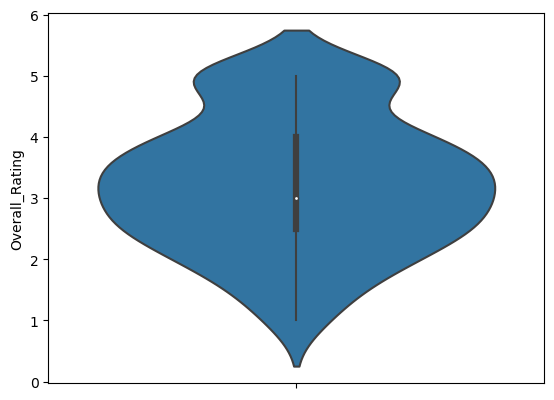

In [44]:
sns.violinplot(data=data , y='Overall_Rating')
plt.show()

### pair plot

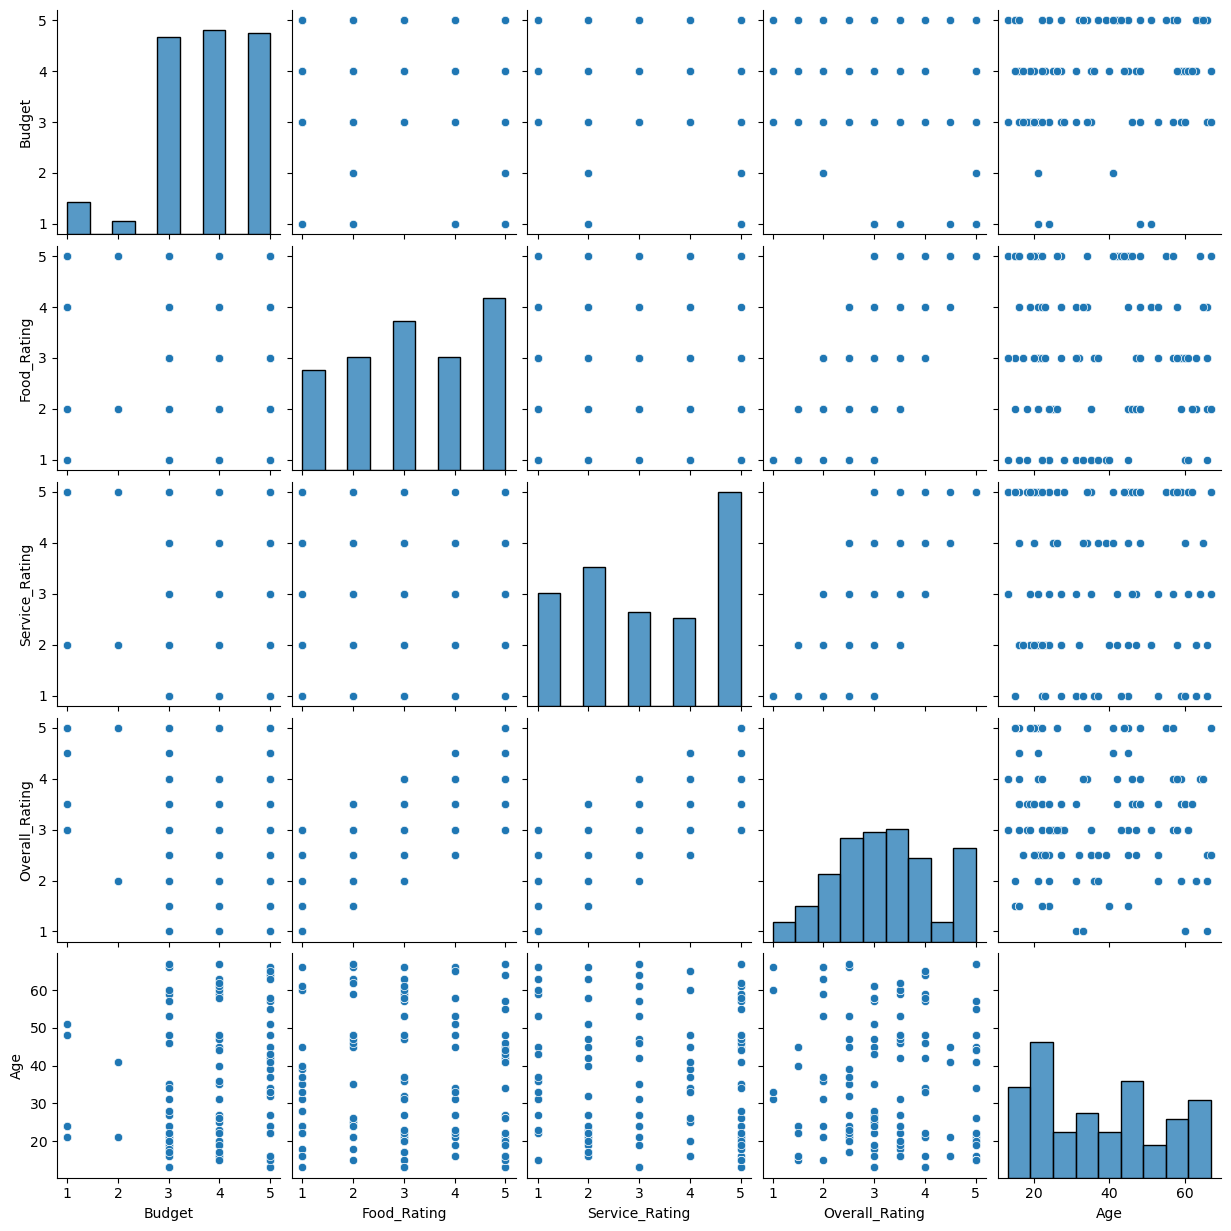

In [45]:
sns.pairplot(data=data)
plt.show()

## Relplot

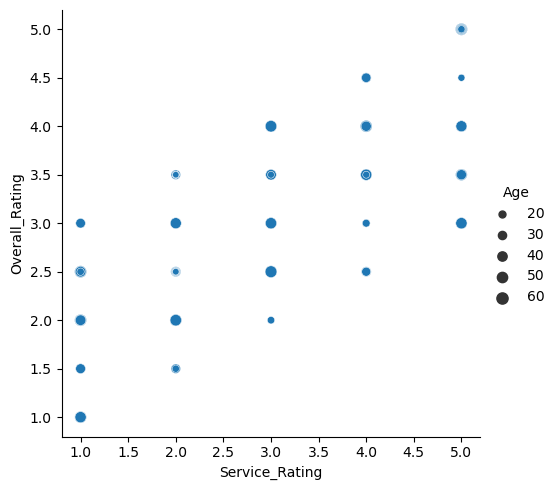

In [56]:
sns.relplot(data=data, x='Service_Rating' , y='Overall_Rating',size='Age')
plt.show()